<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week6/Day5/W6D5_XP_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


# 1. Data Loading And Exploration:

In [35]:
df = pd.read_csv('train.csv')


In [36]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [38]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


We dont have missed values, all columns has relevant data types. Except may be some boolean type of (0,1)values columns

'Price Range' is target variable, other are dependencies

# 2. Data Cleaning And Preprocessing:

We already have categorical data in numerical format

# 3. Statistical Analysis With NumPy And SciPy:

In [39]:
np.mean(df)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
price_range         1.50000
dtype: float64

In [41]:
df_range = np.ptp(df)
df_range

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:279: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  umr_maximum(a, axis, None, out, keepdims),
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:280: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  umr_minimum(a, axis, None, None, keepdims),


battery_power    1497.0
blue                1.0
clock_speed         2.5
dual_sim            1.0
fc                 19.0
four_g              1.0
int_memory         62.0
m_dep               0.9
mobile_wt         120.0
n_cores             7.0
pc                 20.0
px_height        1960.0
px_width         1498.0
ram              3742.0
sc_h               14.0
sc_w               18.0
talk_time          18.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         3.0
dtype: float64

In [42]:
np.std(df)

battery_power     439.308338
blue                0.499975
clock_speed         0.815800
dual_sim            0.499910
fc                  4.340358
four_g              0.499538
int_memory         18.141178
m_dep               0.288343
mobile_wt          35.390804
n_cores             2.287265
pc                  6.062799
px_height         443.669852
px_width          432.091384
ram              1084.460827
sc_h                4.212192
sc_w                4.355308
talk_time           5.462589
three_g             0.426166
touch_screen        0.499991
wifi                0.499951
price_range         1.118034
dtype: float64

In [43]:
np.var(df)

battery_power    1.929918e+05
blue             2.499750e-01
clock_speed      6.655299e-01
dual_sim         2.499098e-01
fc               1.883871e+01
four_g           2.495378e-01
int_memory       3.291023e+02
m_dep            8.314194e-02
mobile_wt        1.252509e+03
n_cores          5.231580e+00
pc               3.675753e+01
px_height        1.968429e+05
px_width         1.867030e+05
ram              1.176055e+06
sc_h             1.774256e+01
sc_w             1.896871e+01
talk_time        2.983988e+01
three_g          1.816178e-01
touch_screen     2.499910e-01
wifi             2.499510e-01
price_range      1.250000e+00
dtype: float64

In [44]:
stats.mode(df)

ModeResult(mode=array([6.180e+02, 0.000e+00, 5.000e-01, 1.000e+00, 0.000e+00, 1.000e+00,
       2.700e+01, 1.000e-01, 1.820e+02, 4.000e+00, 1.000e+01, 3.470e+02,
       8.740e+02, 1.229e+03, 1.700e+01, 1.000e+00, 7.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 0.000e+00]), count=array([   6., 1010.,  413., 1019.,  474., 1043.,   47.,  320.,   28.,
        274.,  122.,    7.,    7.,    4.,  193.,  210.,  124., 1523.,
       1006., 1014.,  500.]))

Calculate skewness and kurtosis


In [45]:

skewness = df.apply(skew)
kurtosis_values = df.apply(kurtosis)
print(f'Skewness: {skewness}')
print()
print(f'Kurtosis: {kurtosis_values}')

Skewness: battery_power    0.031875
blue             0.020001
clock_speed      0.177951
dual_sim        -0.038007
fc               1.019046
four_g          -0.086080
int_memory       0.057846
m_dep            0.089015
mobile_wt        0.006553
n_cores          0.003625
pc               0.017293
px_height        0.665771
px_width         0.014776
ram              0.006623
sc_h            -0.098810
sc_w             0.633312
talk_time        0.009505
three_g         -1.227220
touch_screen    -0.012000
wifi            -0.028003
price_range      0.000000
dtype: float64

Kurtosis: battery_power   -1.224084
blue            -1.999600
clock_speed     -1.323109
dual_sim        -1.998555
fc               0.273386
four_g          -1.992590
int_memory      -1.216034
m_dep           -1.274164
mobile_wt       -1.210351
n_cores         -1.229676
pc              -1.171571
px_height       -0.318075
px_width        -1.186041
ram             -1.191934
sc_h            -1.190815
sc_w            -0.391548
ta

In [46]:
features = df.drop('price_range', axis=1)

correlations = []
p_values = []

for column in features.columns:
    corr, p_value = stats.pearsonr(features[column], df['price_range'])
    correlations.append(corr)
    p_values.append(p_value)


correlation_results = pd.DataFrame({'Feature': features.columns, 'Pearson Correlation': correlations, 'P-Value': p_values})
print(correlation_results)

          Feature  Pearson Correlation       P-Value
0   battery_power             0.200723  1.264854e-19
1            blue             0.020573  3.577985e-01
2     clock_speed            -0.006606  7.678151e-01
3        dual_sim             0.017444  4.355602e-01
4              fc             0.021998  3.254629e-01
5          four_g             0.014772  5.091037e-01
6      int_memory             0.044435  4.693006e-02
7           m_dep             0.000853  9.695879e-01
8       mobile_wt            -0.030302  1.755393e-01
9         n_cores             0.004399  8.441253e-01
10             pc             0.033599  1.330736e-01
11      px_height             0.148858  2.227806e-11
12       px_width             0.165818  8.478969e-14
13            ram             0.917046  0.000000e+00
14           sc_h             0.022986  3.042032e-01
15           sc_w             0.038711  8.348974e-02
16      talk_time             0.021859  3.285375e-01
17        three_g             0.023611  2.9123

Strong correlation was detected only between RAM and price range

# 4. Data Visualization With Matplotlib:

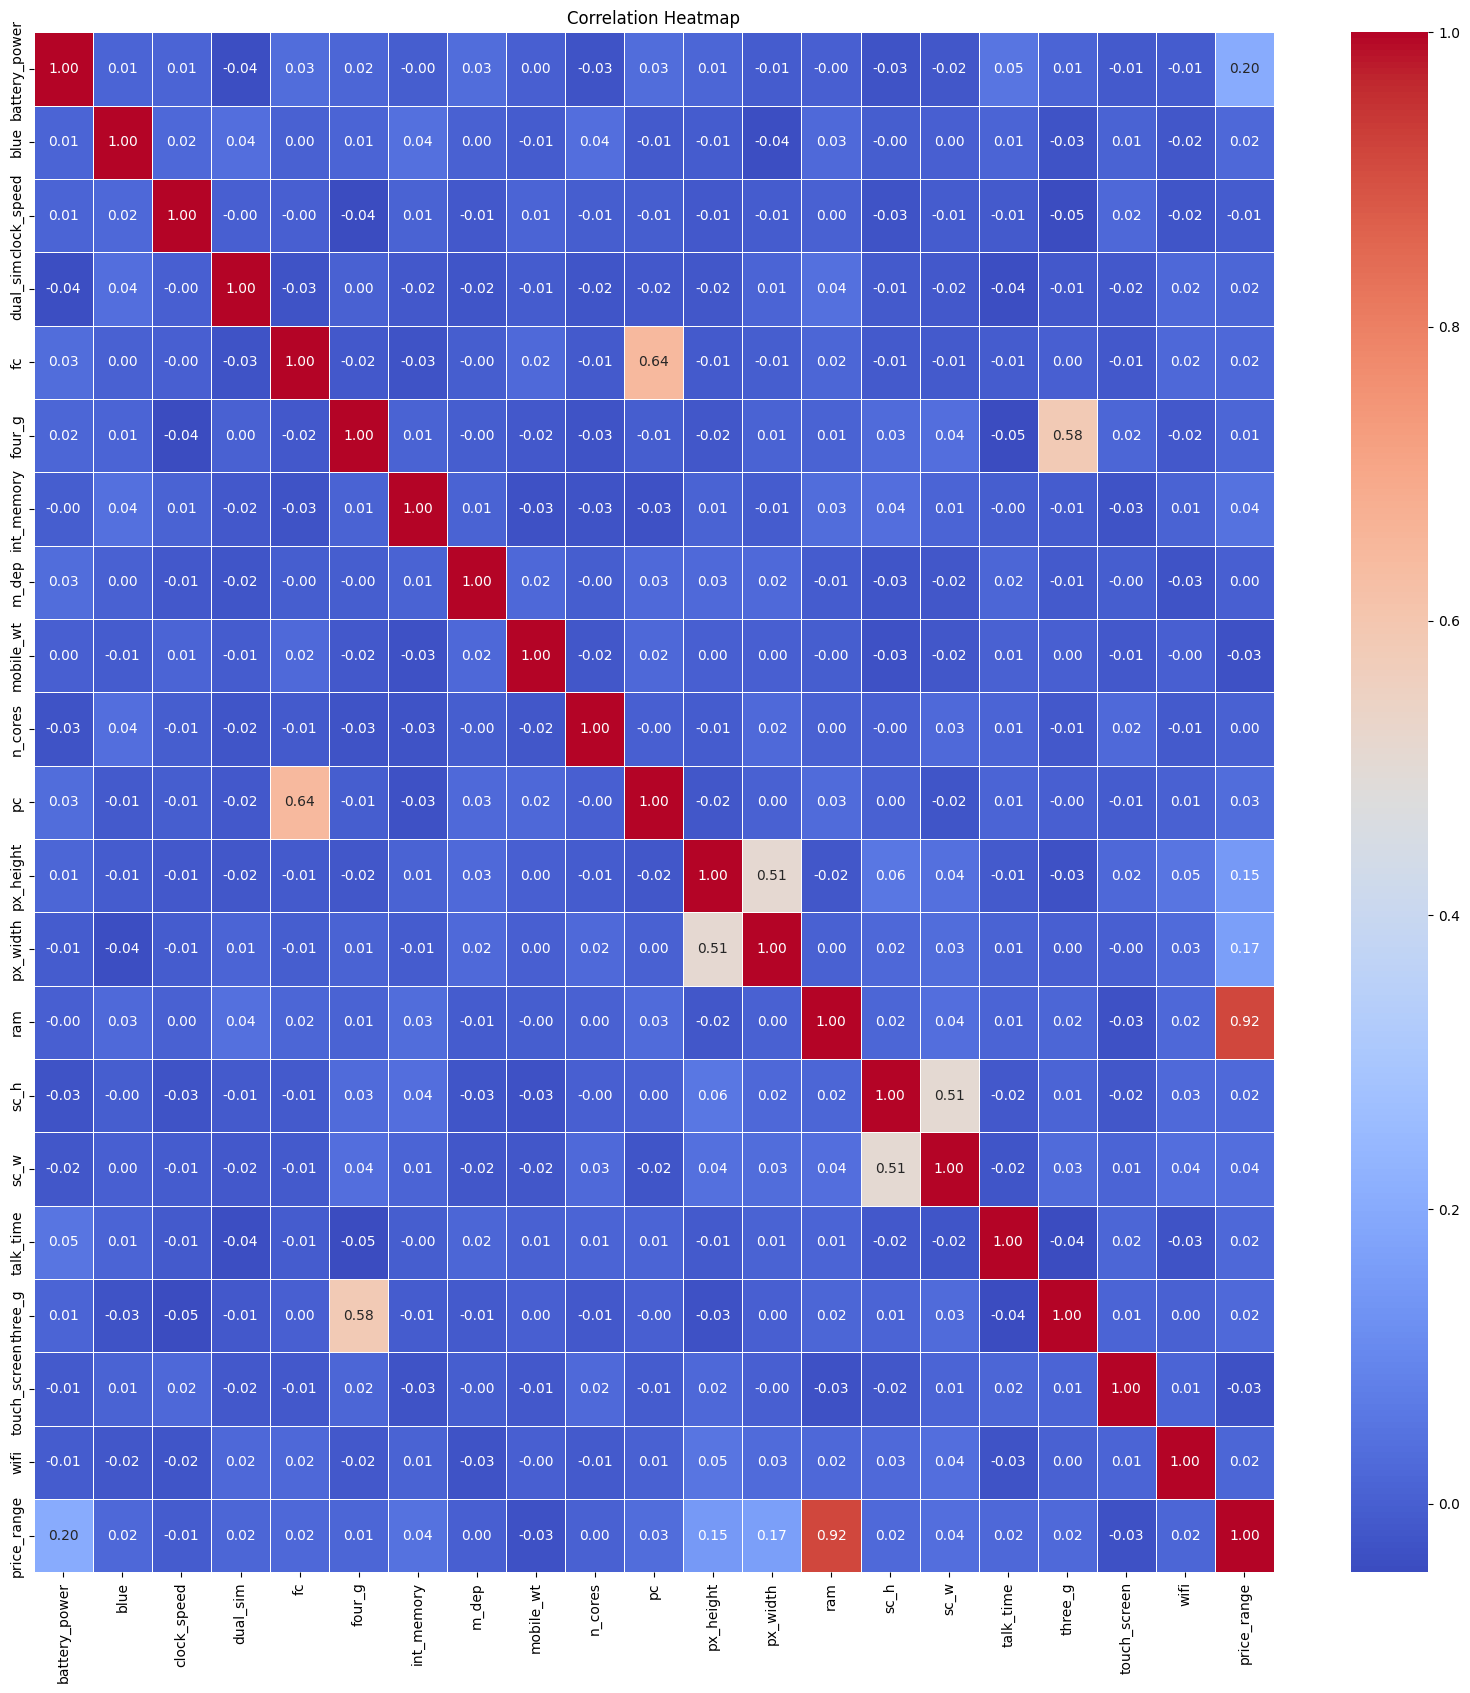

In [47]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

We also detect some correlations betweeen back camera pixels and front camera, and as well as an obvious relationship between screen's shapes

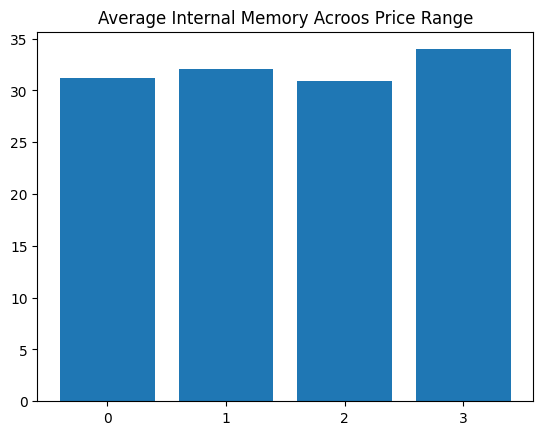

In [70]:
df1 = df.groupby('price_range')['int_memory'].mean()
plt.bar(df1.index,df1.values)
plt.title('Average Internal Memory Across Price Range')
plt.xticks(df1.index)
plt.show()

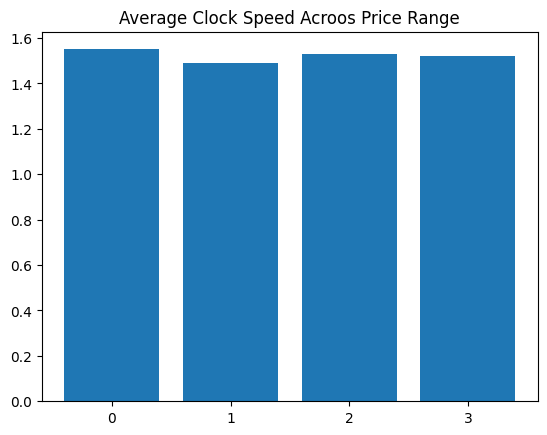

In [72]:
df2 = df.groupby('price_range')['clock_speed'].mean()
plt.bar(df2.index,df2.values)
plt.title('Average Clock Speed Acroos Price Range')
plt.xticks(df2.index)
plt.show()


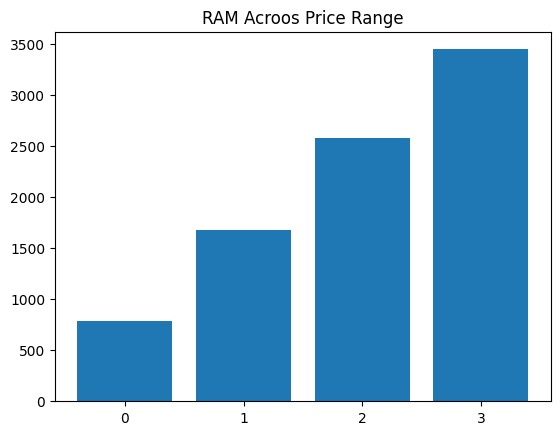

In [74]:
df3 = df.groupby('price_range')['ram'].mean()
plt.bar(df3.index,df3.values)
plt.title('RAM Acroos Price Range')
plt.xticks(df3.index)
plt.show()


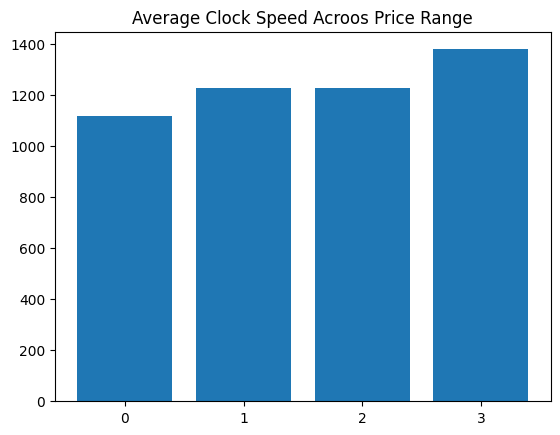

In [75]:

df4 = df.groupby('price_range')['battery_power'].mean()
plt.bar(df4.index,df4.values)
plt.title('Average Microprocessor Speed Acroos Price Range')
plt.xticks(df4.index)
plt.show()

Judging by the graph, there is a relationship between the speed of the microprocessor and the price range

# 5. Insight Synthesis And Conclusion:

Key determinants in mobile price classification is RAM memory size.

Looks like dataset has wrong ranging in price.

Judging by the graph, there is a relationship between the speed of the microprocessor and the price range

We also detect some correlations betweeen back camera pixels and front camera, and as well as an obvious relationship between screen's shapes